In [1]:
from oda_api.api import DispatcherAPI # interface to query MMODA server
from oda_api.plot_tools import OdaImage,OdaLightCurve # tools to retrieve images, lightcurves
from oda_api.data_products import BinaryData
import os

In [2]:
disp=DispatcherAPI(url='https://www.astro.unige.ch/mmoda/dispatch-data',instrument='mock')
# 'mock' is a placeholder, not querying a real object yet

In [3]:
instr_list=disp.get_instruments_list() # list of available instruments on MMODA
for i in instr_list:
    print(i)

isgri
jemx
polar
antares
gw
spi_acs
legacysurvey
auger
desi_legacy_survey
fermi_lat
gaia
hess
iact_simulators
icecube
combine_integral_gallery_products
integral_gallery_products
lst
magic
mwa
sed
sgwb
stix_mwa_solar_activity
synch_ic_brems


In [4]:
print(disp.get_instrument_description('isgri')) # ISGRI instrument details
print(disp.get_product_description(instrument='isgri',product_name='isgri_image')) # ISGRI images details

[[{'instrumet': 'isgri'}, {'prod_dict': {'isgri_image': 'isgri_image_query', 'isgri_lc': 'isgri_lc_query', 'isgri_spectrum': 'isgri_spectrum_query', 'spectral_fit': 'spectral_fit_query'}}, [{'query_name': 'src_query'}, {'name': 'src_name', 'owl_uri': ['http://www.w3.org/2001/XMLSchema#str', 'http://odahub.io/ontology#String', 'http://odahub.io/ontology#AstrophysicalObject'], 'restrictions': {'is_optional': False}, 'units': 'str', 'value': '1E 1740.7-2942'}, {'name': 'RA', 'owl_uri': ['http://odahub.io/ontology#Angle'], 'restrictions': {'is_optional': False}, 'units': 'deg', 'value': 265.97845833}, {'name': 'DEC', 'owl_uri': ['http://odahub.io/ontology#Angle'], 'restrictions': {'is_optional': False}, 'units': 'deg', 'value': -29.74516667}, {'name': 'T1', 'owl_uri': ['http://odahub.io/ontology#TimeInstant'], 'restrictions': {'is_optional': False}, 'units': 'isot', 'value': '2017-03-06T13:26:48.000'}, {'name': 'T_format', 'units': 'str', 'value': 'isot'}, {'name': 'T2', 'owl_uri': ['http:

MOSAIC IMAGE (ISGRI)

In [5]:
data_collection=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      T1='2003-03-15T23:27:40.0', # start time
                      T2='2003-03-16T00:03:15.0', # end time
                      E1_keV=20.0, # lower energy bound in keV
                      E2_keV=40.0, # upper energy bound in keV
                      osa_version='OSA10.2',
                      RA=257.815417,
                      DEC=-41.593417,
                      detection_threshold=5.0, # detection threshold sigma level
                      radius=15., # search radius in degrees
                      product_type='Real') # real data

please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


In [6]:
data_collection.show() # summary of retrieved data

ID=0 prod_name=mosaic_image_0_mosaic  meta_data: {'product': 'mosaic', 'instrument': 'isgri', 'src_name': '', 'query_parameters': None}

ID=1 prod_name=dispatcher_catalog_1  meta_data: 



In [7]:
# access member by name or by position in data list (here the main mosaic image):
data_collection.mosaic_image_0_mosaic
data_collection._p_list[0] 

In [8]:
print(data_collection.dispatcher_catalog_1.table) # associated source catalog

meta_ID  src_names      significance    ... FLAG        ERR_RAD        
                                        ...                            
------- ------------ ------------------ ... ---- ----------------------
     68 OAO 1657-415 17.827661514282227 ...    0 0.00014000000373926014
     74  4U 1700-377  21.19563102722168 ...    0  0.0002800000074785203
     77     GX 349+2 13.917550086975098 ...    0  0.0002800000074785203
    130     GX 354-0   8.97690486907959 ...    0  0.0002800000074785203


In [9]:
data_collection.mosaic_image_0_mosaic.show() # info on the image
data_collection.mosaic_image_0_mosaic.show_meta()

------------------------------
name: mosaic_image
meta_data dict_keys(['product', 'instrument', 'src_name', 'query_parameters'])
number of data units 6
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: GROUPING
data uniti 2 ,name: ISGR-MOSA-IMA
data uniti 3 ,name: ISGR-MOSA-IMA
data uniti 4 ,name: ISGR-MOSA-IMA
data uniti 5 ,name: ISGR-MOSA-IMA
------------------------------
product : mosaic
instrument : isgri
src_name : 
query_parameters : None
------------------------------


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 52713.977697 from DATE-OBS.
Set MJD-END to 52713.998368 from DATE-END'. [astropy.wcs.wcs]
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/oda_api/plot_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


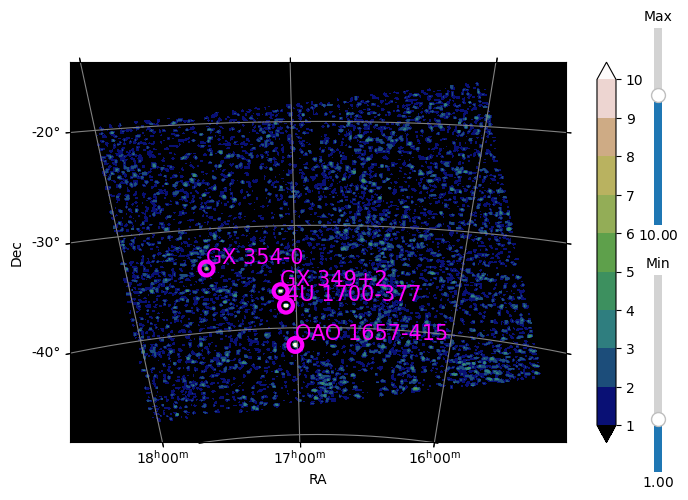

In [10]:
im=OdaImage(data_collection)
im.show(unit_ID=4)  # display image

LIGHT CURVE (ISGRI)

In [ ]:
data_collection=disp.get_product(instrument='isgri',
                      product='isgri_lc',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      time_bin=70,
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      radius=15.,
                      product_type='Real')

please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


In [ ]:
data_collection.show() # lists all available light curves
data_collection.isgri_lc_2_GX349p2.show() # select light curve of GX349p2

In [ ]:
for ID,s in enumerate(data_collection._p_list): # list object IDs
    print (ID,s.meta_data['src_name'])

In [ ]:
lc=data_collection._p_list[0] # first light curve
print(lc.data_unit[1].data)
lc.show()
print(lc.meta_data)

In [ ]:
OdaLightCurve(lc).show(unit_ID=1) # plot light curve

#% ISGRI SPECTRUM

In [ ]:
from threeML.plugins.OGIPLike import  OGIPLike
from threeML.io.package_data import get_path_of_data_file
from threeML import *
import matplotlib.pylab as plt

In [ ]:
data_collection=disp.get_product(instrument='isgri',
                      product='isgri_spectrum',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      radius=15.,
                      product_type='Real')

In [ ]:
data_collection.show()
d=data_collection._p_list[0] # first spectrum
print(d.meta_data)

In [ ]:
# Can select all products from same source name: 
data_sel=data_collection.new_from_metadata('src_name','4U 1700-377') # choose source
data_sel.show()
data_sel.save_all_data() # save these products

In [ ]:
ogip_data = OGIPLike('ogip',
                     observation='prod_0_4U1700m377_isgri_spectrum.fits', # obtained from data_sel.show()
                     arf_file= 'prod_1_4U1700m377_isgri_arf.fits' ,
                     response= 'prod_2_4U1700m377_isgri_rmf.fits')

In [ ]:
ogip_data.set_active_measurements('20-60') # channel ranges

In [ ]:
ogip_data.view_count_spectrum() # plot spectrum
plt.ylim(1E-5,10)

In [ ]:
# Fit the spectrum: 
fit_function = Cutoff_powerlaw()
point_source = PointSource('ps', 0, 0, spectral_shape=fit_function)
model = Model(point_source)
datalist = DataList(ogip_data)
jl = JointLikelihood(model, datalist)
jl.fit();

In [ ]:
display_spectrum_model_counts(jl, step=True) # display model spectrum

In [ ]:
plot_point_source_spectra(jl.results, ene_min=20, ene_max=60, num_ene=100,
                          flux_unit='erg / (cm2 s)')